# Análise Exploratória

In [1]:
# Importando as bibliotecas

import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn')


In [2]:
# Upload do arquivo

from google.colab import files
arq = files.upload()

Saving AdventureWorks.xlsx to AdventureWorks.xlsx


In [3]:
# Criando nosso DataFrame
df = pd.read_excel('AdventureWorks.xlsx')

In [4]:
# Visualizando as 5 primeiras linhas
df.head()

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
1,2008-05-12,2008-05-17,306,384,19051,200805123CS567,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
2,2008-05-14,2008-05-20,306,384,19052,200805143CS576,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
3,2008-05-21,2008-05-27,306,384,19052,200805213CS576,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
4,2008-06-20,2008-06-27,306,384,19053,200806203CS586,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red


In [7]:
# Quantidade de linhas e colunas
df.shape

(904, 16)

In [8]:
# Verificando os tipos de dados
df.dtypes

Data Venda        datetime64[ns]
Data Envio        datetime64[ns]
ID Loja                    int64
ID Produto                 int64
ID Cliente                 int64
No. Venda                 object
Custo Unitário           float64
Preço Unitário           float64
Quantidade                 int64
Valor Desconto           float64
Valor Venda              float64
Produto                   object
Fabricante                object
Marca                     object
Classe                    object
Cor                       object
dtype: object

In [9]:
# Qual a receita total ?

df['Valor Venda'].sum()

5984606.1426

In [11]:
# Qual o custo total ?

df['Custo'] = df['Custo Unitário'].mul(df['Quantidade']) # Criando a coluna de custo


In [13]:
df.head(1)

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,Custo
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48


In [14]:
# Qual o custo total ?

round(df['Custo'].sum(), 2) # round = arredondar as casas decimais.

2486783.05

In [15]:
# Agora que temos a receita, custo e o total, podemos achar o Lucro total
# Vamos criar uma coluna de Lucro que sera (Receita - Custo)

df['Lucro'] = df['Valor Venda'] - df['Custo']

In [16]:
df.head(1)

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,Custo,Lucro
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48,2456.52


In [17]:
# Total de Lucro

round(df['Lucro'].sum(), 2)

3497823.09

In [18]:
# Criando um coluna com o total de dias para enviar o produto

df['Tempo_Envio'] = df['Data Envio'] - df['Data Venda']

In [19]:
df.head(1)

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,Custo,Lucro,Tempo_Envio
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48,2456.52,20 days


#### **Agora queremos saber a média do tempo de envio para cada Marca, e para isso precisamos transformar a coluna Tempo_Envio em numérica**

In [20]:
# Extraindo apenas os dias

df['Tempo_Envio'] = (df['Data Envio'] - df['Data Venda']).dt.days

In [21]:
df.head(1)

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,Custo,Lucro,Tempo_Envio
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48,2456.52,20


In [25]:
# Verificando o tipo de dados da coluna Tempo_Envio
df['Tempo_Envio'].dtype

dtype('int64')

In [27]:
# Média do Tempo de envio para cada marca

round(df.groupby('Marca')['Tempo_Envio'].mean(), 1)

Marca
Adventure Works    8.7
Contoso            8.5
Fabrikam           8.5
Name: Tempo_Envio, dtype: float64

#### **Missing Values**

In [28]:
# Verificando se temos dados faltantes

df.isnull().sum()

Data Venda        0
Data Envio        0
ID Loja           0
ID Produto        0
ID Cliente        0
No. Venda         0
Custo Unitário    0
Preço Unitário    0
Quantidade        0
Valor Desconto    0
Valor Venda       0
Produto           0
Fabricante        0
Marca             0
Classe            0
Cor               0
Custo             0
Lucro             0
Tempo_Envio       0
dtype: int64

#### **E, se a gente quiser saber o Lucro por Ano e por Marca**

In [31]:
# Vamos Agrupar o Lucro por Ano e Marca

df.groupby([df['Data Venda'].dt.year, 'Marca'])['Lucro'].sum()

Data Venda  Marca          
2008        Adventure Works             306,641.16
            Contoso                      56,416.00
            Fabrikam                  1,557,020.55
2009        Adventure Works             405,395.08
            Contoso                     138,258.95
            Fabrikam                  1,034,091.35
Name: Lucro, dtype: float64

In [30]:
# Configuração para alterar os valores de notação cientifica para float.
pd.options.display.float_format = '{:20,.2f}'.format

In [32]:
# Resetando o index
lucro_ano = df.groupby([df['Data Venda'].dt.year, 'Marca'])['Lucro'].sum().reset_index()
lucro_ano

,Data Venda,Marca,Lucro
0,2008,Adventure Works,"306,641.16"
1,2008,Contoso,"56,416.00"
2,2008,Fabrikam,"1,557,020.55"
3,2009,Adventure Works,"405,395.08"
4,2009,Contoso,"138,258.95"
5,2009,Fabrikam,"1,034,091.35"


In [33]:
df.head(1)

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,Custo,Lucro,Tempo_Envio
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",20


In [36]:
# Qual o total de produtos vendidos para cada Produto ?
df.groupby('Produto')['Quantidade'].sum().sort_values(ascending=False)

Produto
Headphone Adapter for Contoso Phone E130 Silver    25232
Headphone Adapter for Contoso Phone E130 White     25008
Adventure Works Laptop15.4W M1548 Black             1089
Fabrikam Trendsetter 2/3'' 17mm X100 Grey           1087
Adventure Works Laptop15.4W M1548 Red               1047
Fabrikam Trendsetter 2/3'' 17mm X100 Black           926
Fabrikam Trendsetter 1/3'' 8.5mm X200 Black          884
Fabrikam Trendsetter 1/3'' 8.5mm X200 Grey           845
Fabrikam Trendsetter 1/3'' 8.5mm X200 White          789
Name: Quantidade, dtype: int64

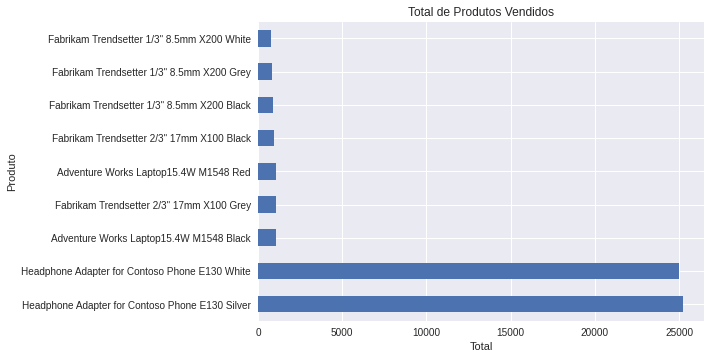

In [39]:
# Grafico total de produtos vendidos

df.groupby('Produto')['Quantidade'].sum().sort_values(ascending=False).plot.barh()
plt.title('Total de Produtos Vendidos')
plt.xlabel('Total')
plt.ylabel('Produto');

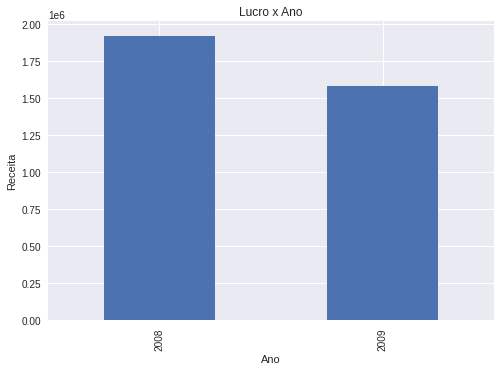

In [41]:
# Grafico do Lucro por ano

df.groupby([df['Data Venda'].dt.year])['Lucro'].sum().plot.bar()
plt.title('Lucro x Ano')
plt.xlabel('Ano')
plt.ylabel('Receita');

In [46]:
df.groupby(df['Data Venda'].dt.year)['Lucro'].sum()

Data Venda
2008           1,920,077.71
2009           1,577,745.38
Name: Lucro, dtype: float64

In [48]:
# Selecionando apenas as vendas de 2009
df_2009 = df[df['Data Venda'].dt.year == 2009]

In [49]:
df_2009.head()

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,Custo,Lucro,Tempo_Envio
11,2009-05-02,2009-05-14,199,384,18938,200905023CS847,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",12
12,2009-05-16,2009-05-27,306,384,19067,200905163CS746,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",11
13,2009-05-31,2009-06-12,306,384,19068,200905313CS748,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",12
14,2009-06-28,2009-07-11,199,384,18959,200906283CS870,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",13
15,2009-07-08,2009-07-12,306,384,19070,200907083CS757,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",4


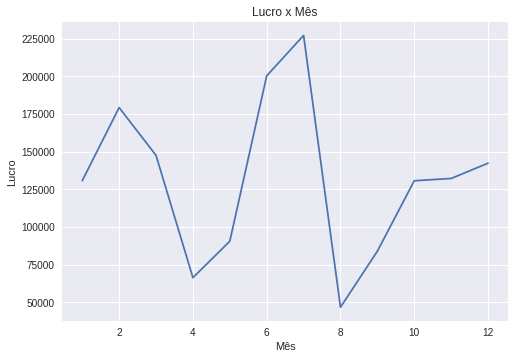

In [51]:
# Grafico de linhas do Total de lucros por mês

df_2009.groupby(df_2009['Data Venda'].dt.month)['Lucro'].sum().plot()
plt.title('Lucro x Mês')
plt.xlabel('Mês')
plt.ylabel('Lucro');

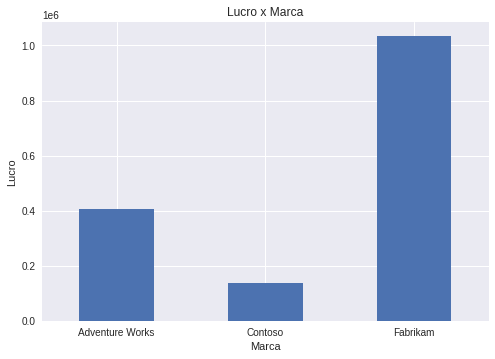

In [54]:
# Grafico de barra do Lucro total por Marca

df_2009.groupby(df_2009['Marca'])['Lucro'].sum().plot.bar()
plt.title('Lucro x Marca')
plt.xlabel('Marca')
plt.ylabel('Lucro')
plt.xticks(rotation='horizontal'); # Importante !!

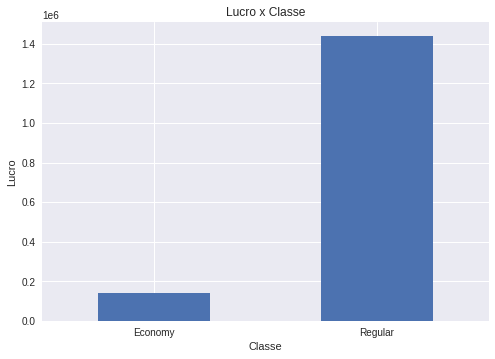

In [56]:
# Grafico de barra do Lucro total pela Classe

df_2009.groupby(df_2009['Classe'])['Lucro'].sum().plot.bar()
plt.title('Lucro x Classe')
plt.xlabel('Classe')
plt.ylabel('Lucro')
plt.xticks(rotation='horizontal');

In [57]:
df['Tempo_Envio'].describe()

count                 904.00
mean                    8.54
std                     3.06
min                     4.00
25%                     6.00
50%                     9.00
75%                    11.00
max                    20.00
Name: Tempo_Envio, dtype: float64

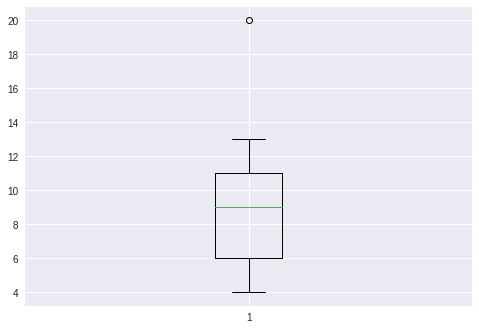

In [58]:
# Grafico de Boxplot
# valor descrepante fora do padrao marcado pela bolinha na parte superior do grafico (outliier)
plt.boxplot(df['Tempo_Envio']);

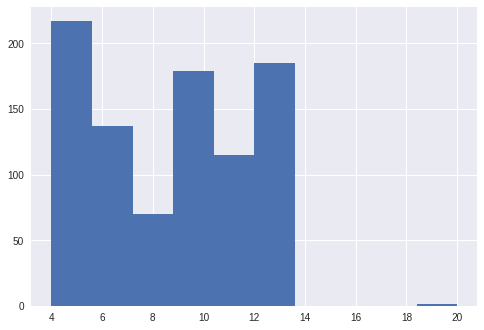

In [59]:
# Histograma
plt.hist(df['Tempo_Envio']);

In [60]:
# Tempo minimo de envio
df['Tempo_Envio'].min()

4

In [61]:
# Tempo maximo de envio
df['Tempo_Envio'].max()

20

In [62]:
# Indentificando os Outlier

df[df['Tempo_Envio'] == 20]

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,Custo,Lucro,Tempo_Envio
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",20


In [63]:
df.to_csv('df_vendas_novo.csv', index=False)